# Data Preprocessing


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data.csv')
# Matrix of features -
X = dataset.iloc[0:, 1:-1].values
y = dataset.iloc[:, -1].values
# Datset without the labels (excluding row0 and column0)
dataset_no_labels = dataset.iloc[0:, 1:].values

In [3]:
print(X)

[[  1.           1.           0.         341.1201759  189.152977
   95.55485275]
 [  0.           0.           0.         118.6100868   88.05878773
   66.45606407]
 [  1.           1.           0.          77.25457572  63.91527665
   40.76602354]
 ...
 [  1.           0.           1.         156.714606    81.73808051
   32.68387225]
 [  0.           0.           0.         343.0003647  196.4049129
  109.3941584 ]
 [  0.           0.           0.         468.0851649  201.1384875
   76.06663409]]


In [11]:
print(y)

[ 75.18180738  93.01158133  -1.58863177 ... 187.1155391  265.6732347
 352.7798772 ]


In [12]:
dataset.shape

(2550, 8)

In [13]:
dataset.isnull().sum()

S.No.    0
X_1      0
X_2      0
X_3      0
X_4      0
X_5      0
X_6      0
Y        0
dtype: int64

In [14]:
X.shape, y.shape

((2550, 6), (2550,))

In [15]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S.No.,2550.0,1275.500000,736.265917,1.000000,638.250000,1275.500000,1912.750000,2550.000000
X_1,2550.0,0.492941,0.500048,0.000000,0.000000,0.000000,1.000000,1.000000
X_2,2550.0,0.507059,0.500048,0.000000,0.000000,1.000000,1.000000,1.000000
X_3,2550.0,0.508235,0.500030,0.000000,0.000000,1.000000,1.000000,1.000000
X_4,2550.0,252.348506,146.556638,0.050706,128.646969,248.703167,380.425920,511.547524
X_5,2550.0,148.595290,51.316469,23.360330,109.060187,147.028108,188.597512,273.331562
X_6,2550.0,89.852496,35.302143,29.013959,59.582918,89.919219,119.406005,151.990754
Y,2550.0,175.961880,125.695888,-113.121946,85.310735,159.972378,256.186915,545.342187


# Feature Selection

## 1) Matrix of correlations

#### Now in the matrix of features (X), we can check for which variables are independent and which are not.
#### One way is to find the correlation between the variables. There are different

In [16]:
import seaborn as sns

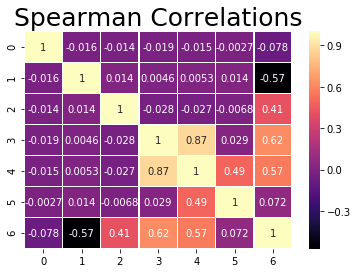

,0,1,2,3,4,5,6
0,1.0,1.0,0.0,341.120176,189.152977,95.554853,75.181807
1,0.0,0.0,0.0,118.610087,88.058788,66.456064,93.011581
2,1.0,1.0,0.0,77.254576,63.915277,40.766024,-1.588632
3,1.0,0.0,1.0,476.980523,261.558968,144.335903,512.778893
4,1.0,0.0,1.0,258.225846,198.145003,144.487597,364.063824


In [17]:
df_no_labels = pd.DataFrame(data=dataset_no_labels)
sns.heatmap(df_no_labels.corr(method = 'spearman'), annot=True, cmap='magma', linecolor='white', linewidths=.5,  annot_kws={'size':10})
plt.title('Spearman Correlations', fontsize=25)
plt.show()
df_no_labels.head()

#### Check which columns are correlated to the target column.

In [18]:
cor = df_no_labels.corr()
# Correlation with output variable
cor_target = abs(cor[6])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

1    0.578472
3    0.627082
4    0.578512
6    1.000000
Name: 6, dtype: float64

#### Now we will check if these columns are related to each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.

In [19]:
print(df_no_labels[[1,3]].corr())
print(df_no_labels[[3,4]].corr())
print(df_no_labels[[1,4]].corr())

          1         3
1  1.000000  0.004261
3  0.004261  1.000000
          3         4
3  1.000000  0.869222
4  0.869222  1.000000
          1         4
1  1.000000  0.003649
4  0.003649  1.000000


#### Therefore, it can be seen that column 3 and 4 are highly correlated, so we might drop column 4, as column 3 has higher correlation to column 6. Also we can say column 1 has a very high negative correlation with 'Y'.

#### Before we start dropping the redundant independent variables, let us check the Variance inflation factor (VIF) among the independent variables. VIF quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate’s standard deviation) of an estimated regression coefficient is increased because of collinearity. In general, we should aim for the VIF of less than 10 for the independent variables.

## 3) Variance inflation factor (VIF) 

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
df_no_dependent = df_no_labels.drop([6], axis=1)
df_no_dependent.head()

,0,1,2,3,4,5
0,1.0,1.0,0.0,341.120176,189.152977,95.554853
1,0.0,0.0,0.0,118.610087,88.058788,66.456064
2,1.0,1.0,0.0,77.254576,63.915277,40.766024
3,1.0,0.0,1.0,476.980523,261.558968,144.335903
4,1.0,0.0,1.0,258.225846,198.145003,144.487597


In [22]:
vif = pd.DataFrame()
vif["Features"] = df_no_dependent.columns
vif["VIF_Factor"] = [variance_inflation_factor(df_no_dependent.values, i) for i in range(df_no_dependent.shape[1])]
print(vif)

   Features  VIF_Factor
0         0    1.841500
1         1    1.894908
2         2    1.889648
3         3  200.509319
4         4  601.925706
5         5  133.743486


## Drop the useless variables

In [23]:
dataset_proper_features = df_no_dependent.drop([4], axis=1)
dataset_proper_features.head()

,0,1,2,3,5
0,1.0,1.0,0.0,341.120176,95.554853
1,0.0,0.0,0.0,118.610087,66.456064
2,1.0,1.0,0.0,77.254576,40.766024
3,1.0,0.0,1.0,476.980523,144.335903
4,1.0,0.0,1.0,258.225846,144.487597


## Re-evaluate VIF

In [24]:
vif = pd.DataFrame()
vif["Features"] = dataset_proper_features.columns
vif["VIF_Factor"] = [variance_inflation_factor(dataset_proper_features.values, i) for i in range(dataset_proper_features.shape[1])]
print(vif)

   Features  VIF_Factor
0         0    1.809689
1         1    1.886215
2         2    1.858545
3         3    3.122326
4         5    4.020826


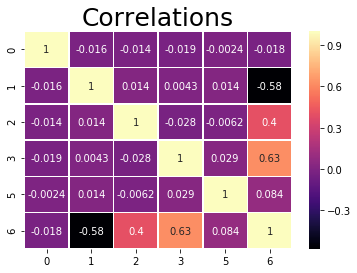

In [25]:
df_no_labels = df_no_labels.drop([4], axis=1)
sns.heatmap(df_no_labels.corr(), annot=True, cmap='magma', linecolor='white', linewidths=.5,  annot_kws={'size':10})
plt.title('Correlations', fontsize=25)
plt.show()

In [31]:
correlation = df_no_labels.corr(method='pearson')
columns = correlation.nlargest(6, 6).index
columns

Int64Index([6, 3, 2, 5, 0, 1], dtype='int64')

#### At this point, we have removed column 4, which is 'X_5' from our model, as it had high collinearity with column 3 which is 'X_4'

In [19]:
X_features = dataset_proper_features.iloc[:, :-1].values
y_features = dataset_proper_features.iloc[:, -1].values

In [20]:
X_features

array([[  1.        ,   1.        ,   0.        , 341.1201759 ],
       [  0.        ,   0.        ,   0.        , 118.6100868 ],
       [  1.        ,   1.        ,   0.        ,  77.25457572],
       ...,
       [  1.        ,   0.        ,   1.        , 156.714606  ],
       [  0.        ,   0.        ,   0.        , 343.0003647 ],
       [  0.        ,   0.        ,   0.        , 468.0851649 ]])

## Splitting the dataset into the Training set and Test set

In [21]:
# test_size -> 20% observations will go into test set and 80% in training set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size = 0.2, random_state = 1)
X_train

array([[  0.        ,   1.        ,   1.        , 479.7540788 ],
       [  0.        ,   0.        ,   0.        , 267.9958507 ],
       [  0.        ,   0.        ,   0.        ,  60.19068358],
       ...,
       [  1.        ,   0.        ,   1.        , 311.5971814 ],
       [  1.        ,   1.        ,   0.        , 344.8916958 ],
       [  1.        ,   1.        ,   0.        , 199.5621521 ]])

In [22]:
X_train.shape

(2040, 4)

# Now we will run different regression models

## Now we have removed correlations. Now we store these columns as a new dataset and then convert it into a csv file, so we can import it in other notebooks. I will use different notebooks to run different regression models, and then another one to check which was the best model.

In [36]:
#df_no_labels = pd.read_csv('removed_correlations.csv', index_col=0)
df_no_labels.to_csv('removed_correlations.csv')
df_no_labels

,0,1,2,3,5,6
0,1.0,1.0,0.0,341.120176,95.554853,75.181807
1,0.0,0.0,0.0,118.610087,66.456064,93.011581
2,1.0,1.0,0.0,77.254576,40.766024,-1.588632
3,1.0,0.0,1.0,476.980523,144.335903,512.778893
4,1.0,0.0,1.0,258.225846,144.487597,364.063824
5,0.0,1.0,1.0,436.479141,123.022191,257.813592
6,0.0,0.0,0.0,170.861648,43.909546,131.875397
7,0.0,0.0,0.0,251.966160,65.494297,213.349491
8,1.0,1.0,0.0,422.642291,69.007915,108.021622
9,1.0,0.0,1.0,183.710547,69.119658,222.380301


## Above we used Pearsons correlation as we can see below, column '5' does not have a linear relationship with the target column '6'

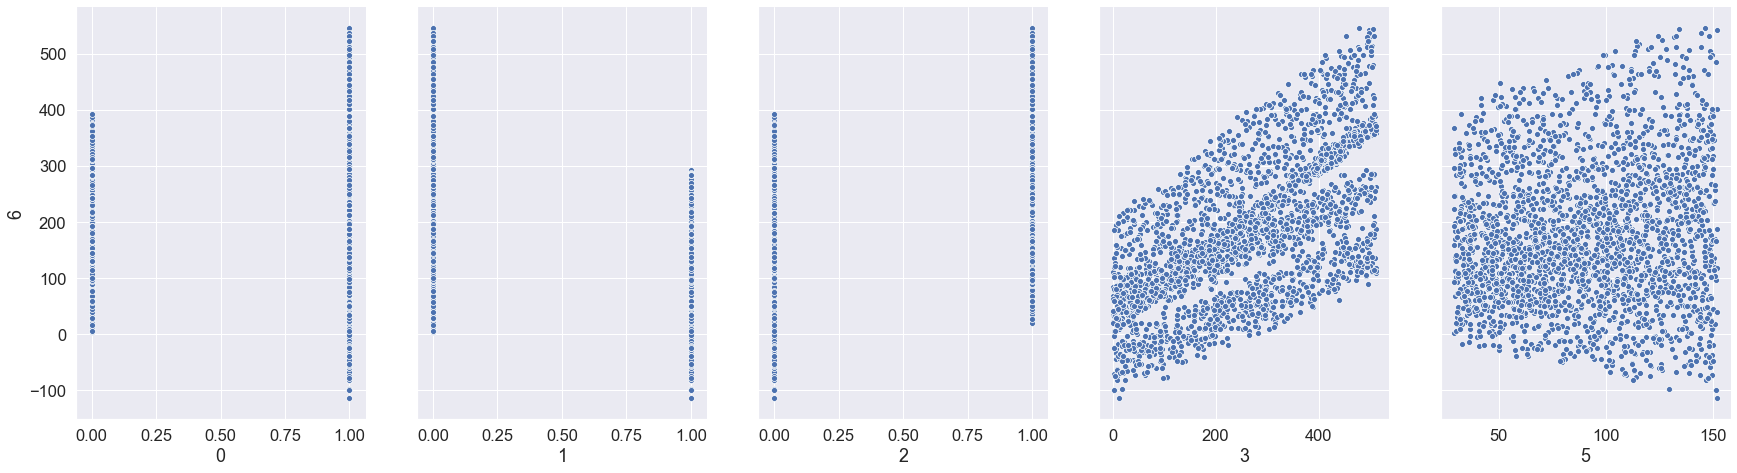

In [43]:
# visualize the relationship between the features and the response using scatterplots
sns.set(context="notebook", palette="deep", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
p = sns.pairplot(df_no_labels, x_vars=[0,1,2,3,5], y_vars=6, size=7, aspect=0.7)
